In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score

In [13]:
data = pd.read_csv("train.csv.xls")
test = pd.read_csv("test.csv.xls")

In [14]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [15]:
data.drop('Loan_ID', inplace=True, axis=1)

In [16]:
test.drop('Loan_ID', inplace=True, axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x21e6ef53c40>,
 'caps': [<matplotlib.lines.Line2D at 0x21e6f3981c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e6ef539a0>],
 'medians': [<matplotlib.lines.Line2D at 0x21e6f398700>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e6f3989a0>],
 'means': []}

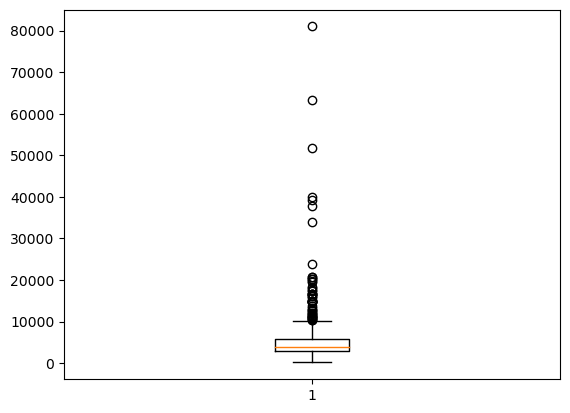

In [17]:
plt.boxplot(data['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac800d36a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac800d3c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac800d33d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac800dd220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac800dd4f0>],
 'means': []}

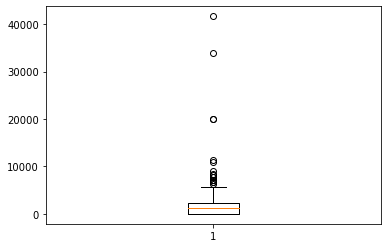

In [10]:
plt.boxplot(data['CoapplicantIncome'])

In [11]:
#CLEANING DATA BY FILLING IN MISSING VALUES IN DATASET

In [18]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [20]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [16]:
data.Gender = data.Gender.fillna('Male')
test.Gender = test.Gender.fillna('Male')

In [17]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [18]:
data.Married = data.Married.fillna('Yes')

In [19]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [20]:
test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [21]:
data.Dependents = data.Dependents.fillna('0')
test.Dependents = test.Dependents.fillna('0')

In [22]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [23]:
test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [21]:
data.Self_Employed = data.Self_Employed.fillna('No')
test.Self_Employed = test.Self_Employed.fillna('No')

In [22]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.median())
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.median())

In [26]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [27]:
test['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [23]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)
test.Loan_Amount_Term = test.Loan_Amount_Term.fillna(360.0)

In [24]:
data.Loan_Amount_Term = (data.Loan_Amount_Term)/60
test.Loan_Amount_Term = (test.Loan_Amount_Term)/60

In [30]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [31]:
test['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [25]:
data.Credit_History = data.Credit_History.fillna(1.0)
test.Credit_History = test.Credit_History.fillna(1.0)

In [33]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [35]:
data['Dependents'].replace('3+',3,inplace = True)

In [36]:
test['Dependents'].replace('3+',3,inplace = True)

In [37]:
data['Loan_Status'].replace('Y',1,inplace = True)
data['Loan_Status'].replace('N',0,inplace = True)

In [26]:
data.rename(columns = {'ApplicantIncome':'TotalIncome'}, inplace = True)
test.rename(columns = {'ApplicantIncome':'TotalIncome'}, inplace = True)

In [27]:
data.TotalIncome = data.TotalIncome + data.CoapplicantIncome
test.TotalIncome = test.TotalIncome + test.CoapplicantIncome

In [28]:
data.drop('CoapplicantIncome', inplace=True, axis=1)
test.drop('CoapplicantIncome', inplace=True, axis=1)

In [29]:
data['EMI'] = ''
data.EMI = (data.LoanAmount*(0.11/12)*(pow((1+(0.11/12)),data.Loan_Amount_Term)))/((pow((1+(0.11/12)),data.Loan_Amount_Term))-1)

In [30]:
test['EMI'] = ''
test.EMI = (test.LoanAmount*(0.11/12)*(pow((1+(0.11/12)),test.Loan_Amount_Term)))/((pow((1+(0.11/12)),test.Loan_Amount_Term))-1)

In [31]:
data['BalanceIncome'] = ''
data.BalanceIncome = (data.TotalIncome-(12*data.EMI))

In [32]:
test['BalanceIncome'] = ''
test.BalanceIncome = (test.TotalIncome-(12*test.EMI))

In [33]:
data = pd.get_dummies(data, columns = ['Gender'])

In [34]:
data = pd.get_dummies(data, columns = ['Married'])

In [35]:
data = pd.get_dummies(data, columns = ['Education'])

In [36]:
data = pd.get_dummies(data, columns = ['Self_Employed'])

In [37]:
data = pd.get_dummies(data, columns = ['Property_Area'])

In [52]:
data

,Dependents,TotalIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,EMI,BalanceIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,128.0,6.0,1.0,1,22.022982,5584.724215,0,1,1,0,1,0,1,0,0,0,1
1,1,6091.0,128.0,6.0,1.0,0,22.022982,5826.724215,0,1,0,1,1,0,1,0,1,0,0
2,0,3000.0,66.0,6.0,1.0,1,11.355600,2863.732798,0,1,0,1,1,0,0,1,0,0,1
3,0,4941.0,120.0,6.0,1.0,1,20.646546,4693.241452,0,1,0,1,0,1,1,0,0,0,1
4,0,6000.0,141.0,6.0,1.0,1,24.259691,5708.883706,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900.0,71.0,6.0,1.0,1,12.215873,2753.409525,1,0,1,0,1,0,1,0,1,0,0
610,3,4106.0,40.0,3.0,1.0,1,13.578521,3943.057745,0,1,0,1,1,0,1,0,1,0,0
611,1,8312.0,253.0,6.0,1.0,1,43.529801,7789.642394,0,1,0,1,1,0,1,0,0,0,1
612,2,7583.0,187.0,6.0,1.0,1,32.174200,7196.909595,0,1,0,1,1,0,1,0,0,0,1


C:\Users\HP\AppData\Local\Temp\ipykernel_23880\3235984977.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_hm = data.corr(method='pearson')


<Axes: >

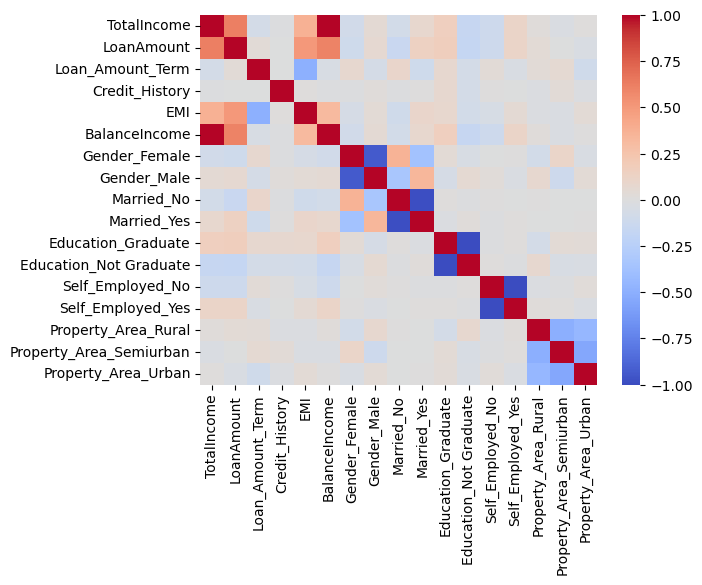

In [38]:
corr_hm = data.corr(method='pearson')
sb.heatmap(corr_hm,cmap='coolwarm',vmin=-1, vmax=1)

The correlation of LoanAmount-ApplicantIncome and CreditHistory-LoanStatus isrelatively higher ie 57% and 54% respectively, on the other hand EMI-Loan_Amount_Term are negatively correlated 50% but all values are small enough to be ignored keeping in mind the size of dataset.

In [39]:
test = pd.get_dummies(test, columns = ['Gender'])

In [40]:
test = pd.get_dummies(test, columns = ['Married'])

In [41]:
test = pd.get_dummies(test, columns = ['Education'])

In [42]:
test = pd.get_dummies(test, columns = ['Self_Employed'])

In [43]:
test = pd.get_dummies(test, columns = ['Property_Area'])

In [44]:
test

,Dependents,TotalIncome,LoanAmount,Loan_Amount_Term,Credit_History,EMI,BalanceIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5720,110.0,6.0,1.0,18.926000,5492.887997,0,1,0,1,1,0,1,0,0,0,1
1,1,4576,126.0,6.0,1.0,21.678873,4315.853524,0,1,0,1,1,0,1,0,0,0,1
2,2,6800,208.0,6.0,1.0,35.787346,6370.551849,0,1,0,1,1,0,1,0,0,0,1
3,2,4886,100.0,6.0,1.0,17.205455,4679.534543,0,1,0,1,1,0,1,0,0,0,1
4,0,3276,78.0,6.0,1.0,13.420255,3114.956943,0,1,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,3+,5786,113.0,6.0,1.0,19.442164,5552.694034,0,1,0,1,0,1,0,1,0,0,1
363,0,4867,115.0,6.0,1.0,19.786273,4629.564724,0,1,0,1,1,0,1,0,0,0,1
364,0,5243,126.0,6.0,1.0,21.678873,4982.853524,0,1,1,0,1,0,1,0,0,1,0
365,0,7393,158.0,6.0,1.0,27.184619,7066.784578,0,1,0,1,1,0,1,0,1,0,0


In [45]:
x = data.iloc[:,data.columns!='Loan_Status']
y = data.iloc[:,data.columns=='Loan_Status']

In [61]:
x

,Dependents,TotalIncome,LoanAmount,Loan_Amount_Term,Credit_History,EMI,BalanceIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,128.0,6.0,1.0,22.022982,5584.724215,0,1,1,0,1,0,1,0,0,0,1
1,1,6091.0,128.0,6.0,1.0,22.022982,5826.724215,0,1,0,1,1,0,1,0,1,0,0
2,0,3000.0,66.0,6.0,1.0,11.355600,2863.732798,0,1,0,1,1,0,0,1,0,0,1
3,0,4941.0,120.0,6.0,1.0,20.646546,4693.241452,0,1,0,1,0,1,1,0,0,0,1
4,0,6000.0,141.0,6.0,1.0,24.259691,5708.883706,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900.0,71.0,6.0,1.0,12.215873,2753.409525,1,0,1,0,1,0,1,0,1,0,0
610,3,4106.0,40.0,3.0,1.0,13.578521,3943.057745,0,1,0,1,1,0,1,0,1,0,0
611,1,8312.0,253.0,6.0,1.0,43.529801,7789.642394,0,1,0,1,1,0,1,0,0,0,1
612,2,7583.0,187.0,6.0,1.0,32.174200,7196.909595,0,1,0,1,1,0,1,0,0,0,1


In [47]:
approve = 0
denie = 0
for i in range(614):
    if y.Loan_Status[i]==1:
        approve += 1
    else:
        denie += 1
print('Approval Rate : ',(approve/(approve+denie))*100)

Approval Rate :  0.0


In [48]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.25)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
test = scaler.transform(test)

ValueError: could not convert string to float: '3+'

In [65]:
# GAUSSIAN NAIVE BAYES
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(x_train, y_train)
# y_pred_gnb = gnb.predict(x_val)
# print(accuracy_score(y_val,y_pred_gnb))

In [50]:
# LOGISTIC REGRESSION
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag']
penalty = ['l2','l1']
c_values = [10, 1.0, 0.1, 0.01,0.001]
max_ = [100,110,115,120]

grid = dict(solver=solvers,penalty=penalty,C=c_values,max_iter=max_)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train,y_train)

print((grid_result.best_score_, grid_result.best_params_))

lr = LogisticRegression(C=0.010, max_iter= 100, penalty='l1', solver= 'liblinear')
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_val)
print('\n',accuracy_score(y_val, y_pred_lr)*100,'%')

ValueError: 
All the 4800 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: '3+'

--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.


In [67]:
# RANDOM FOREST
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# n = [100,300,500]
# max_ = [10,25,50,75]
# # define grid search
# grid = dict(n_estimators=n,max_depth=max_)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(x_train,y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# from sklearn.ensemble import RandomForestClassifier
# regressor = RandomForestClassifier(max_depth=10,n_estimators=100,random_state=0)
# regressor.fit(x_train, y_train)
# y_pred_rfc = regressor.predict(x_val)
# print(accuracy_score(y_val, y_pred_rfc)*100,'%')

In [68]:
# SUPPORT VECTOR CLASSIFIER (SVM)
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# model = SVC()
# gmma = ['scale', 'auto']
# ker = ['linear','rbf']
# c_values = [10, 1.0, 0.1, 0.01,0.001]
# # define grid search
# grid = dict(gamma=gmma,kernel=ker,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(x_train,y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# from sklearn.svm import SVC
# sv = SVC(gamma='auto')
# sv.fit(x_train, y_train)
# y_pred_svc = sv.predict(x_val)
# print(accuracy_score(y_val, y_pred_svc)*100,'%')

In [69]:
y_pred = lr.predict(test)
y_pred = y_pred.reshape(367,1)
approved = 0
denied = 0
for i in range(367):
    if y_pred[i,0]==1:
        approved += 1
    else:
        denied += 1
print('Approval Rate : ',(approved/(approved+denied))*100)

Approval Rate :  83.92370572207084


USER INTERACTIVE LOAN APPROVAL INTERFACE

In [70]:
print("*ENTER DETAILS TO CHECK FOR LOAN APPROVAL*")
gen = str(input('Gender(M/F):'))
mar = str(input('Married(Y/N):'))
dep = int(input('Dependents:'))
edu = str(input('Graduate(Y/N):'))
sel = str(input('Self Employed(Y/N):'))
pro = str(input('Property Area(Urban(U)/Semiurban(S)/Rural(R)):'))
tot = int(input('Total Income:'))
loa = int(input('Loan Amount:'))
ter = int(input('Loan Term(in months):'))
cre = int(input('Credit History(0/1):'))
emi = (loa*(0.11/12)*(pow((1+(0.11/12)),ter)))/((pow((1+(0.11/12)),ter))-1)
bal = (tot/12)-emi

find = np.array([dep,tot,loa,ter,cre,emi,bal,1 if gen=='F' else 0,1 if gen=='M' else 0,1 if mar=='N' else 0,1 if mar=='Y' else 0,1 if edu=='Y' else 0,1 if edu=='N' else 0,1 if sel=='N' else 0,1 if sel=='Y' else 0,1 if pro=='R' else 0,1 if pro=='S' else 0,1 if pro=='U' else 0],dtype=np.int32)
find = find.reshape(1, -1)

y_find = lr.predict(find)
print('\nLoan Approved\nEMI=',emi) if y_find==1 else print('\nLoan Denied')

if y_find==0:
    if mar=='N':
        print('\nMARRIED applicant has 10% more chance of getting their loan approved')
    if edu=='N':
        print('GRADUATE applicant has 10% more chance of getting their loan approved')
    if cre==0:
        print('An applicant with CREDIT HISTORY 1 has 73% more chance of getting their loan approved')
    if dep!=2:
        print('An applicant with atleast 2 dependents has 5% - 10% more chance of getting their loan approved')
    if pro!='S':
        print('An applicant living in a Suburban Area has 10% - 15% more chance of getting their loan approved')

*ENTER DETAILS TO CHECK FOR LOAN APPROVAL*
Gender(M/F):M
Married(Y/N):Y
Dependents:2
Graduate(Y/N):Y
Self Employed(Y/N):Y
Property Area(Urban(U)/Semiurban(S)/Rural(R)):U
Total Income:23563
Loan Amount:4322
Loan Term(in months):2
Credit History(0/1):1

Loan Approved
EMI= 2190.758938891164
